## Trump Model Training

In [1416]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras import regularizers
import tensorflow as tf


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [1833]:
## define paths to data files
path_to_train_data = Path("C:/Users/gutda/pycharm_projects/jass-data/filtered_to_csv/train/")
path_to_test_data = Path("C:/Users/gutda/pycharm_projects/jass-data/filtered_to_csv/test/")
#path_to_val_data = Path("/Users/jabbathegut/PycharmProjects/DL4G/jass-demo/my_jass/models/val")

In [1834]:
# train data
data_train = pd.read_csv(path_to_train_data / 'filtered_data0001.csv', header=None)

In [1835]:
data_test = pd.read_csv(path_to_test_data / 'filtered_data0001.csv', header=None)

In [1836]:
data_train_f0 = (data_train[data_train[37]==0])
data_train_f1 = (data_train[data_train[37]==1])
data_train_f2 = (data_train[data_train[37]==2])
data_train_f3 = (data_train[data_train[37]==3])
data_train_f4 = (data_train[data_train[37]==4])
data_train_f5 = (data_train[data_train[37]==5])
data_train_f6 = (data_train[data_train[37]==6])

print(f"0 = {len(data_train_f0)}, 1 = {len(data_train_f1)}, 2 = {len(data_train_f2)}, 3 = {len(data_train_f3)}, 4 = {len(data_train_f4)}, 5 = {len(data_train_f5)}, 6 = {len(data_train_f6)}")


0 = 11999, 1 = 12325, 2 = 16495, 3 = 16178, 4 = 14856, 5 = 18270, 6 = 55951


In [1837]:
data_train_f0 = data_train_f0[0: 11000]
data_train_f1 = data_train_f1[0: 11000]
data_train_f2 = data_train_f2[0: 11000]
data_train_f3 = data_train_f3[0: 11000]
data_train_f4 = data_train_f4[0: 11000]
data_train_f5 = data_train_f5[0: 11000]
data_train_f6 = data_train_f6[0: 0] #don't train on schiebe

data_train = pd.concat([data_train_f0, data_train_f1, data_train_f2, data_train_f3, data_train_f4, data_train_f5, data_train_f6])
data_train = data_train.sample(frac=1)
len(data_train)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
92883,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,4
40604,0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
68142,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,3
77257,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,1,1,0,0,0,5
40773,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1838]:
data_test_f0 = data_test[data_test[37]==0]
data_test_f1 = data_test[data_test[37]==1]
data_test_f2 = data_test[data_test[37]==2]
data_test_f3 = data_test[data_test[37]==3]
data_test_f4 = data_test[data_test[37]==4]
data_test_f5 = data_test[data_test[37]==5]
data_test_f6 = data_test[data_test[37]==6]

print(f"0 = {len(data_test_f0)}, 1 = {len(data_test_f1)}, 2 = {len(data_test_f2)}, 3 = {len(data_test_f3)}, 4 = {len(data_test_f4)}, 5 = {len(data_test_f5)}, 6 = {len(data_test_f6)}")


0 = 3906, 1 = 4096, 2 = 5459, 3 = 5373, 4 = 4830, 5 = 6093, 6 = 18647


In [1847]:
data_test_f0 = data_test_f0[0:2200]
data_test_f1 = data_test_f1[0:2000]
data_test_f2 = data_test_f2[0:2000]
data_test_f3 = data_test_f3[0:2000]
data_test_f4 = data_test_f4[0:2000]
data_test_f5 = data_test_f5[0:2000]
data_test_f6 = data_test_f6[0:0] # change this value if output of 7 dimensions (with schiebe is needed)

data_test = pd.concat([data_test_f0, data_test_f1, data_test_f2, data_test_f3, data_test_f4, data_test_f5, data_test_f6])
data_test = data_test.sample(frac=1)
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
4803,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,3
1510,1,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,5
4147,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
12252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
616,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2


In [1784]:
#data_val.head()

## Label data for readability

In [1848]:
# Add colums. Each card and the information 
# if the player played forehand or not is a feature. That means we have 37 features.
# We also remove the player_id, because we do not care in the beginning

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']
trump = ['trump']

data_train.columns = cards + forehand + trump
data_test.columns = cards + forehand  + trump
#data_val.columns = cards + forehand + user + trump

# remove user column
#data_train.drop('user', axis='columns', inplace=True)
#data_test.drop('user', axis='columns', inplace=True)
#data_val.drop('user', axis='columns', inplace=True)

data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
92883,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,4
40604,0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
68142,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,3
77257,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,1,1,0,0,0,5
40773,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Prepare data from files, eg. generate subsets

In [1849]:
# colums used for extracting x and y values. The same effect could be achieved with train_test_split-Method, but 
# since we already have different files, we dont need to split the files using this method.
data_X_columns = cards + forehand
data_Y_colums = trump

x_train = data_train[data_X_columns]
y_train = data_train[data_Y_colums]

x_test = data_test[data_X_columns]
y_test = data_test[data_Y_colums]

#x_val = data_val[data_X_columns]
#y_val = data_val[data_Y_colums]

## Create model and train it

In [1689]:
# We have 37 features, so we have a node for each feature. There are 7 output categories: each trump color(4), 
# obe-abe, unde-ufe, schiebe. So we need an reducing function with 7 elements
model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

opt = Adam()

# , kernel_regularizer=regularizers.l2(0.01)

model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1124 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1125 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1126 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1127 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1128 (Dense)           (None, 6)                 228       
Total params: 5,852
Trainable params: 5,852
Non-trainable params: 0
_________________________________________________________________
None


In [1670]:
#log_dir="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# callback für tensor board
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# we need to convert the y_train to a array with 7 elements, to represent each of the 7 categories
y_train_categorical = to_categorical(y_train)

history = model.fit(x_train, y_train_categorical, epochs=100, batch_size=100)

Train on 66000 samples
Epoch 1/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.9621 - accuracy: 0.6925
Epoch 2/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.6012 - accuracy: 0.7950
Epoch 3/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.5426 - accuracy: 0.8063
Epoch 4/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.5095 - accuracy: 0.8140
Epoch 5/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4903 - accuracy: 0.8177
Epoch 6/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4771 - accuracy: 0.8214
Epoch 7/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4677 - accuracy: 0.8229
Epoch 8/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4623 - accuracy: 0.8256
Epoch 9/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.4578 - accuracy: 0.8268
Epoch

66000/66000 [==============================] - 1s 12us/sample - loss: 0.4056 - accuracy: 0.8421
Epoch 75/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.4064 - accuracy: 0.8396
Epoch 76/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.4054 - accuracy: 0.8408
Epoch 77/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4047 - accuracy: 0.8412
Epoch 78/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.4055 - accuracy: 0.8406
Epoch 79/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4044 - accuracy: 0.8412
Epoch 80/100
66000/66000 [==============================] - 1s 13us/sample - loss: 0.4049 - accuracy: 0.8405
Epoch 81/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4034 - accuracy: 0.8425
Epoch 82/100
66000/66000 [==============================] - 1s 12us/sample - loss: 0.4041 - accuracy: 0.8412
Epoch 83/100
66000/66000 [======

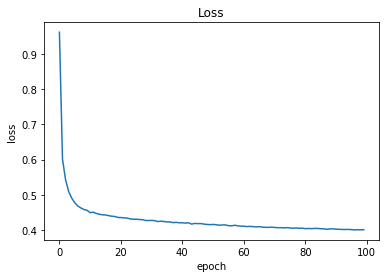

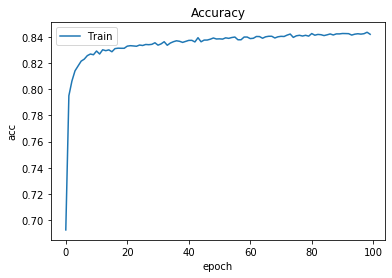

In [1671]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train'], loc='upper left')

In [1672]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

12200/12200 [==============================] - 0s 17us/sample - loss: 0.4585 - accuracy: 0.8233


[0.45854049380685463, 0.82327867]

In [1673]:
from tensorflow.keras.models import load_model
#model.save("final_model_82_games_025_mean_03_std_06.h5")

In [1851]:
from tensorflow.keras.models import load_model
model = load_model('final_model_82_games_025_mean_03_std_06.h5')
model.summary()

Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1119 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1120 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1121 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1122 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1123 (Dense)           (None, 6)                 228       
Total params: 5,852
Trainable params: 5,852
Non-trainable params: 0
_________________________________________________________________


In [1852]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

12200/12200 [==============================] - 0s 16us/sample - loss: 0.4585 - accuracy: 0.8233


[0.4585404926831605, 0.82327867]

In [1843]:
from tensorflow.keras.models import load_model
model = load_model('final_model_75_games_025_mean_03_std_06.h5')
model.summary()

Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1044 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1045 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1046 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1047 (Dense)           (None, 37)                1406      
_________________________________________________________________
dense_1048 (Dense)           (None, 7)                 266       
Total params: 5,890
Trainable params: 5,890
Non-trainable params: 0
_________________________________________________________________


In [1850]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

ValueError: A target array with shape (12200, 6) was passed for an output of shape (None, 7) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.